In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

print(tf.__version__)

2023-07-30 14:53:31.407052: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-30 14:53:31.576221: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-30 14:53:32.142373: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.12.1


In [2]:
train_df = pd.read_csv("../data/mnist_data/train.csv")
test_df = pd.read_csv("../data/mnist_data/test.csv")
submisson_sample_df = pd.read_csv("../data/mnist_data/sample_submission.csv")

In [3]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
x_train = train_df.drop(columns="label")
y_train= train_df['label']
x_test = test_df

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(42000, 784)
(42000,)
(28000, 784)


In [6]:
x_train /= 255.0
x_test /= 255.0

In [7]:
x_train = x_train.values.reshape(-1,28,28, 1)
x_test = x_test.values.reshape(-1,28,28, 1)


In [8]:
y_train = y_train.values.reshape(-1, 1)
y_train

array([[1],
       [0],
       [1],
       ...,
       [7],
       [6],
       [9]])

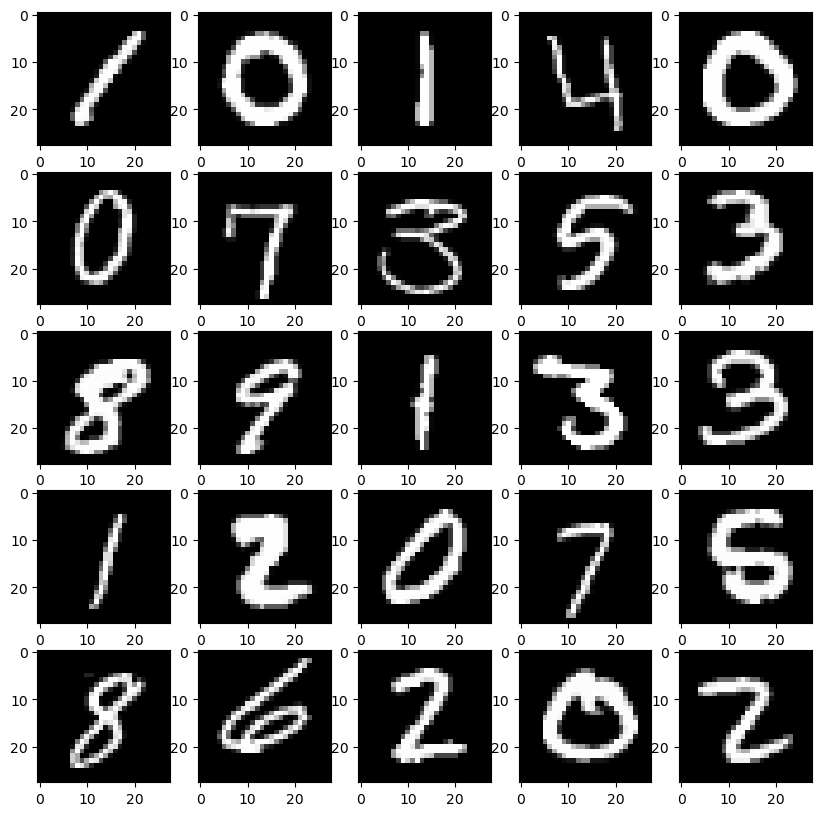

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
plt.show()
    

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

2023-07-30 14:53:35.255561: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-30 14:53:35.274307: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-30 14:53:35.274660: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [11]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape)

(33600, 28, 28, 1) (33600, 1)


In [13]:
y_train

array([[6],
       [5],
       [3],
       ...,
       [2],
       [6],
       [0]])

In [14]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10


2023-07-30 14:53:37.010998: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-07-30 14:53:37.018433: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f9827598210 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-30 14:53:37.018442: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2023-07-30 14:53:37.034331: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-07-30 14:53:37.178905: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8903
2023-07-30 14:53:37.314644: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the p

1050/1050 [==============================] - 2s 641us/step - loss: 0.3243 - accuracy: 0.9067
Epoch 2/10
1050/1050 [==============================] - 1s 687us/step - loss: 0.1493 - accuracy: 0.9566
Epoch 3/10
1050/1050 [==============================] - 1s 784us/step - loss: 0.1020 - accuracy: 0.9698
Epoch 4/10
1050/1050 [==============================] - 1s 773us/step - loss: 0.0774 - accuracy: 0.9772
Epoch 5/10
1050/1050 [==============================] - 1s 803us/step - loss: 0.0607 - accuracy: 0.9813
Epoch 6/10
1050/1050 [==============================] - 1s 803us/step - loss: 0.0452 - accuracy: 0.9869
Epoch 7/10
1050/1050 [==============================] - 1s 801us/step - loss: 0.0349 - accuracy: 0.9897
Epoch 8/10
1050/1050 [==============================] - 1s 846us/step - loss: 0.0295 - accuracy: 0.9914
Epoch 9/10
1050/1050 [==============================] - 1s 846us/step - loss: 0.0222 - accuracy: 0.9939
Epoch 10/10
1050/1050 [==============================] - 1s 837us/step - lo

In [15]:
val_loss, val_acc = model.evaluate(x_val, y_val, verbose=2)
print(' test accuracy', val_acc)

263/263 - 0s - loss: 0.1011 - accuracy: 0.9720 - 209ms/epoch - 795us/step
 test accuracy 0.9720237851142883


In [16]:
probalility_model = keras.Sequential([model, keras.layers.Softmax()])

In [17]:
predictions = probalility_model.predict(x_test)

875/875 [==============================] - 0s 414us/step


In [18]:
predictions

array([[3.0502427e-11, 1.2187442e-18, 1.0000000e+00, ..., 1.7368227e-11,
        2.4881791e-10, 4.6018165e-15],
       [9.9999678e-01, 6.6213771e-11, 5.9976046e-10, ..., 2.7184233e-06,
        1.4405909e-12, 4.7098725e-14],
       [7.8077825e-08, 5.9032009e-05, 7.6405850e-05, ..., 1.8555424e-04,
        2.2003970e-04, 9.9884182e-01],
       ...,
       [1.7361114e-11, 1.9515922e-09, 1.2501410e-10, ..., 8.1167625e-12,
        5.4173688e-07, 4.2131706e-08],
       [1.9857902e-09, 4.3340730e-13, 5.3261499e-14, ..., 9.9462852e-07,
        9.6850279e-09, 9.9883121e-01],
       [9.2195166e-12, 6.9643414e-16, 1.0000000e+00, ..., 2.3415720e-15,
        1.5269151e-09, 1.2703509e-13]], dtype=float32)

In [19]:
predictions = np.argmax(predictions, axis=1)

In [20]:
predictions.shape

(28000,)

In [21]:
submisson_sample_df['Label'] = predictions

In [22]:
submisson_sample_df.to_csv('submit_01.csv', index=False)